These are systems with a contact Hamiltonian of the form
$$
H = ps + f(q)s + F(q, t)
$$

We will focus in particular on the Van der Pol oscillator
where $f(q) = - \epsilon (1-q^2)$ and $F(q) = q - \phi(t)$.

In [2]:
from integrators import contact as ic
from integrators.common import rk4
from integrators.lagrangian import forced_lagrangian

from lienard import integrator as li
from lienard import models as lm


def step6(system, dt, p, q, s, t, a=ic.a_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)


def step6e(system, dt, p, q, s, t, a=ic.e_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)


Lienard = lm.Lienard
VanDerPol = lm.VanDerPol

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as si

plt.style.use("fast")  # alt: 'seaborn-white'

# plt.rcParams.update({'font.size': 20, 'font.family': 'serif', 'font.weight':'normal'})
plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.labelsize"] = 26
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.left"] = True
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["savefig.bbox"] = "tight"

In [4]:
def err(x, y):
    return np.maximum.accumulate(np.abs(x - y))

## Orbits $\epsilon = 0$

/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


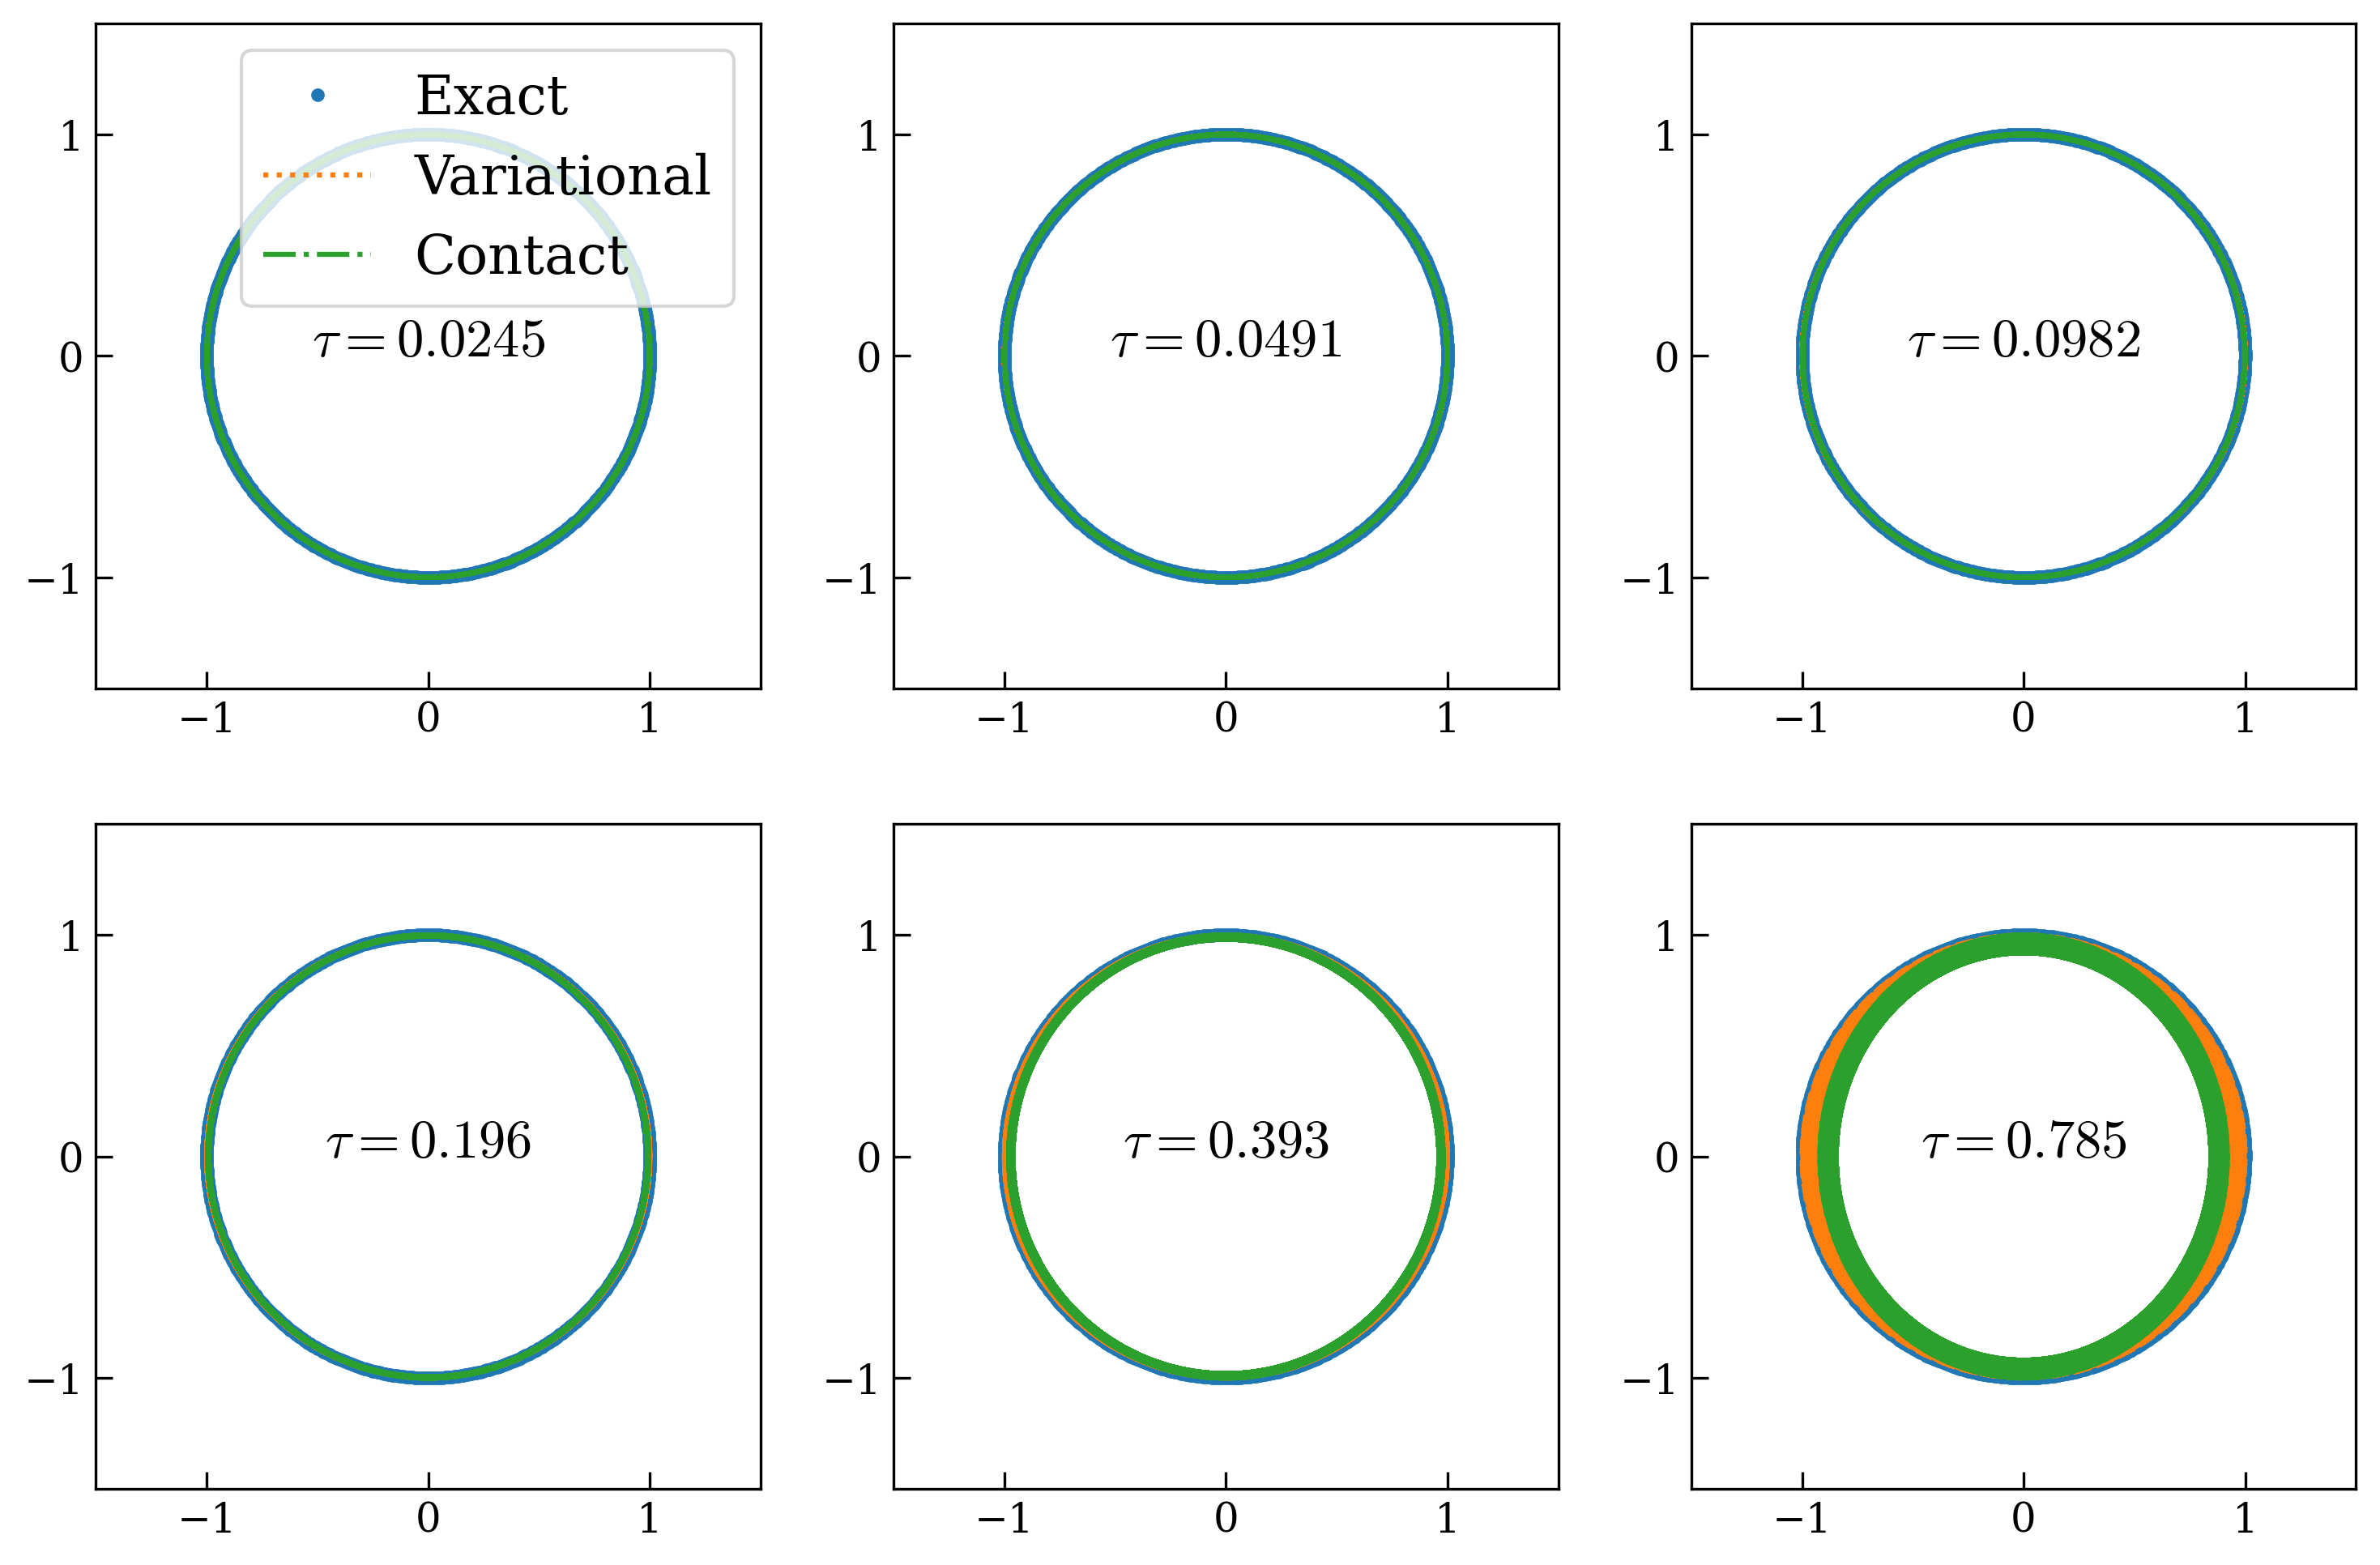

In [5]:
tf = 1000
p0, q0, s0 = 0, 0.0, 1.0
epsilon = 0
vdp = VanDerPol(epsilon, 0, 0)
vdpl = lm.VanDerPolLag(epsilon)

plt.figure(figsize=(12, 8), dpi=300)
tspan0 = np.arange(0, 2 * np.pi, 0.01)
for fact, spl in [(128, 231), (64, 232), (32, 233), (16, 234), (8, 235), (4, 236)]:
    tspan = np.arange(0, tf, np.pi / fact)
    plt.subplot(spl)
    sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
    soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)

    # plt.title(f"$\\tau = \\pi/{fact}$")
    plt.text(
        0,
        0,
        # f"$\\tau = \\pi/{fact}$" if fact > 1 else "$\\tau = \\pi$",
        f"$\\tau={np.pi/fact:.3}$",
        horizontalalignment="center",
        rasterized=True,
    )
    plt.plot(np.cos(tspan0), np.sin(tspan0), ".", label="Exact", lw=0.7)
    plt.plot(
        soll[:, 1],
        soll[:, 0],
        ":",
        label="Variational",
        ms=0.2 if fact > 2 else 5,
        rasterized=True,
    )
    plt.plot(
        sol[:, 1],
        sols[:],
        "-.",
        label="Contact",
        ms=0.2 if fact > 2 else 5,
        rasterized=True,
    )
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlim((-1.5, 1.5))
    plt.ylim((-1.5, 1.5))
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    if spl == 231:
        plt.legend(loc="upper right")

plt.savefig("e0.pdf")
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


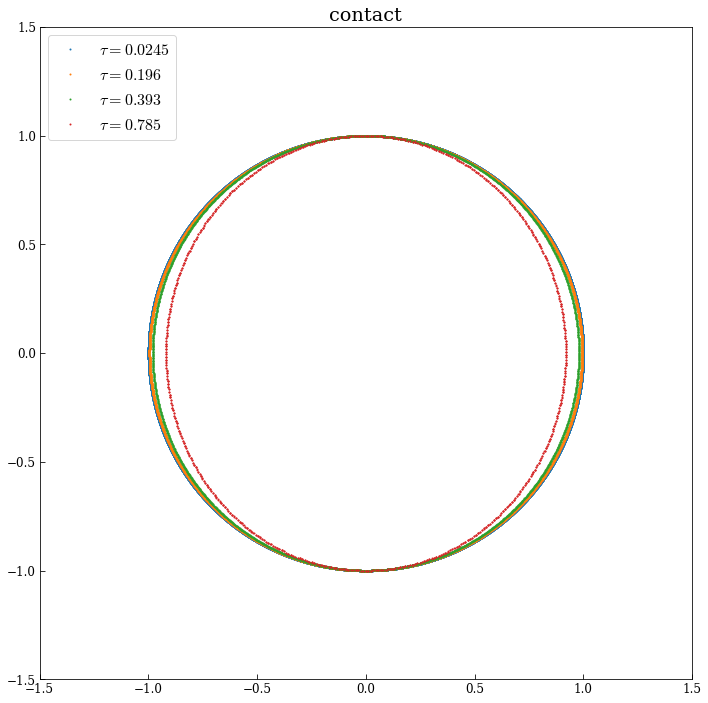

/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


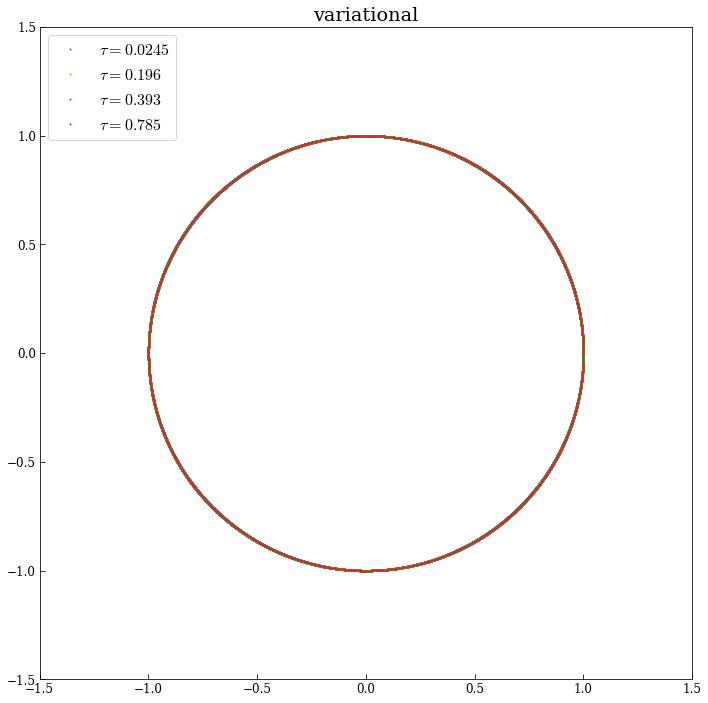

In [6]:
tf = 1000
p0, q0, s0 = 0, 0.0, 1.0
epsilon = 0
vdp = VanDerPol(epsilon, 0, 0)
vdpl = lm.VanDerPolLag(epsilon)

plt.figure(figsize=(12, 12))

for fact in [128, 16, 8, 4]:
    tspan = np.arange(0, tf, np.pi / fact)
    sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
    soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)
    plt.plot(
        sol[:, 1],
        sols,
        ".",
        label=f"$\\tau={np.pi/fact:.3}$",  # r"$\tau = \pi $/" f"${fact}$"
        markersize=2,
    )

plt.title("contact")
plt.gca().set_aspect("equal", adjustable="box")
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(12, 12))
for fact in [128, 16, 8, 4]:
    tspan = np.arange(0, tf, np.pi / fact)
    sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
    soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)
    plt.plot(
        soll[:, 1],
        soll[:, 0],
        ".",
        label=f"$\\tau={np.pi/fact:.3}$",  # r"$\tau = \pi $/" f"${fact}$"
        markersize=2,
    )

plt.title("variational")
plt.gca().set_aspect("equal", adjustable="box")
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.legend(loc="upper left")
plt.show()

## Orbits $\epsilon \sim 1$

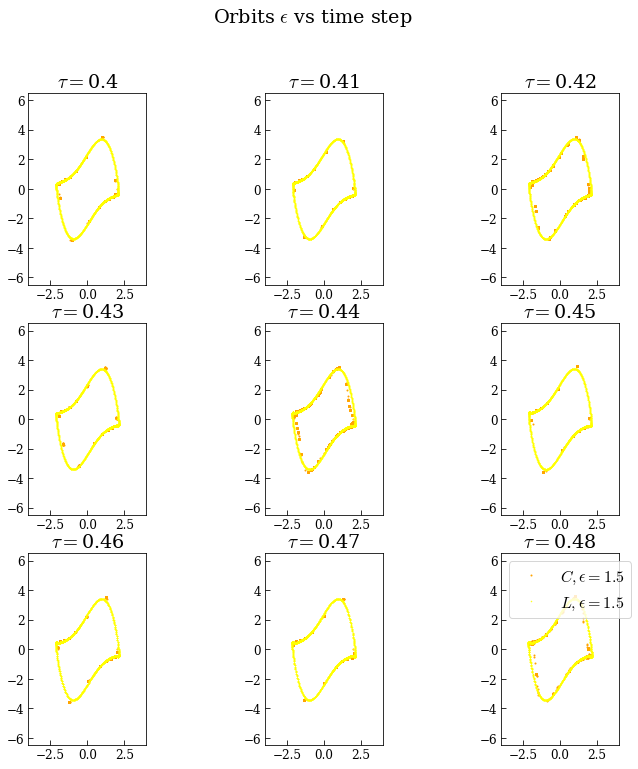

In [7]:
tf = 1000
p0, q0, s0 = 0, 2, 0
plt.figure(figsize=(12, 12))
plt.suptitle(r"Orbits $\epsilon$ vs time step")
steps = [
    (0.4, 331),
    (0.41, 332),
    (0.42, 333),
    (0.43, 334),
    (0.44, 335),
    (0.45, 336),
    (0.46, 337),
    (0.47, 338),
    (0.48, 339),
]

epsilon = 1.5
vdp = VanDerPol(epsilon, 0, 0)
vdpl = lm.VanDerPolLag(epsilon)

for fact, spl in steps:
    tspan = np.arange(0, tf, fact)
    plt.subplot(int(spl))
    plt.gca().set_title(r"$\tau = " f"${fact}")
    sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
    soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)
    plt.plot(
        sol[:, 1],
        sols,
        ".",
        color="orange",
        label=r"$C, \epsilon = $" f"${epsilon}$",
        markersize=2,
    )
    plt.plot(
        soll[:, 1],
        soll[:, 0],
        ".",
        color="yellow",
        label=r"$L, \epsilon = $" f"${epsilon}$",
        markersize=1,
    )

    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlim((-4, 4))
    plt.ylim((-6.5, 6.5))


plt.legend(loc="upper left")
plt.show()

## Limit cycle comparison intermezzo

### $\epsilon = 1.5$

In [8]:
epsilon = 1.5
vdp = VanDerPol(epsilon, 0, 0)
vdpl = lm.VanDerPolLag(epsilon)

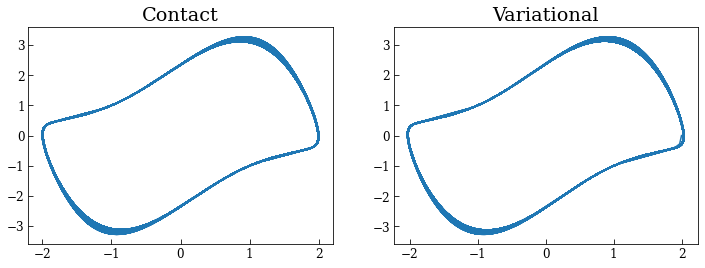

In [9]:
tspan = np.arange(0, tf, 0.2)
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)
plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
ax.plot(sol[:, 1], sols)
ax.set_title("Contact")
ax = plt.subplot(122)
ax.plot(soll[:, 1], soll[:, 0])
ax.set_title("Variational")
plt.show()

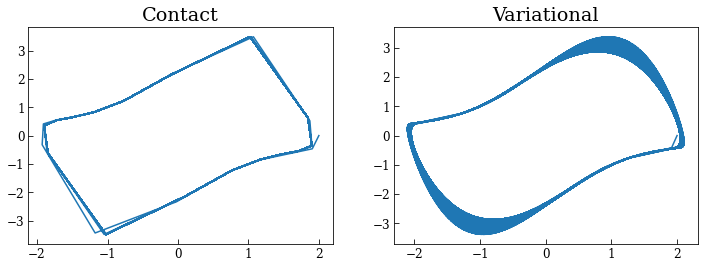

In [10]:
tspan = np.arange(0, tf, 0.4)
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)
plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
ax.plot(sol[:, 1], sols)
ax.set_title("Contact")
ax = plt.subplot(122)
ax.plot(soll[:, 1], soll[:, 0])
ax.set_title("Variational")
plt.show()

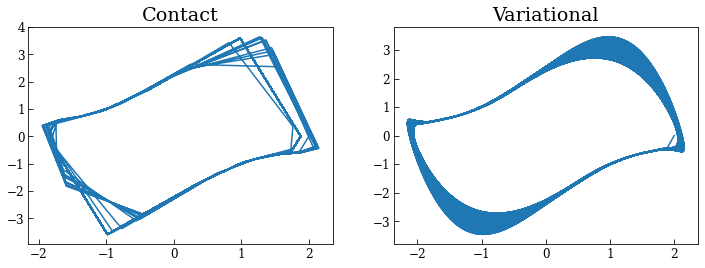

In [11]:
tspan = np.arange(0, tf, 0.5)
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)
plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
ax.plot(sol[:, 1], sols)
ax.set_title("Contact")
ax = plt.subplot(122)
ax.plot(soll[:, 1], soll[:, 0])
ax.set_title("Variational")
plt.show()

### $\epsilon = 5$

In [12]:
epsilon = 5
vdp = VanDerPol(epsilon, 0, 0)
vdpl = lm.VanDerPolLag(epsilon)

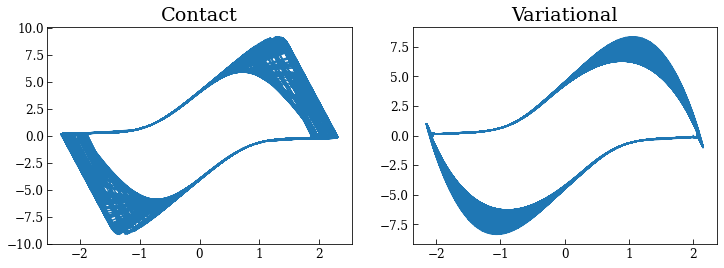

In [13]:
tspan = np.arange(0, tf, 0.2)
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)
plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
ax.plot(sol[:, 1], sols)
ax.set_title("Contact")
ax = plt.subplot(122)
ax.plot(soll[:, 1], soll[:, 0])
ax.set_title("Variational")
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


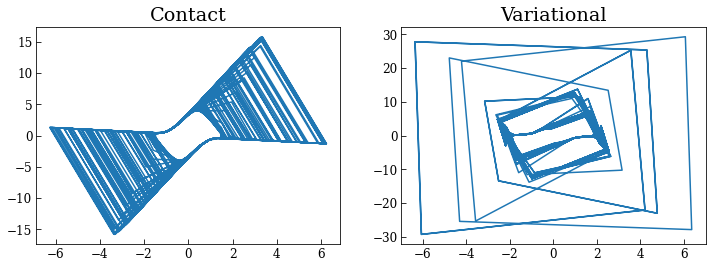

In [14]:
tspan = np.arange(0, tf, 0.4)
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)
plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
ax.plot(sol[:, 1], sols)
ax.set_title("Contact")
ax = plt.subplot(122)
ax.plot(soll[:, 1], soll[:, 0])
ax.set_title("Variational")
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


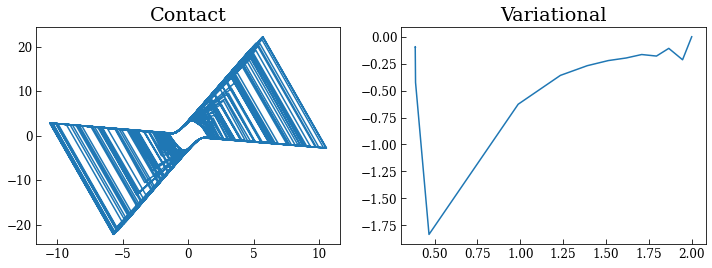

In [15]:
tspan = np.arange(0, tf, 0.5)
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)
plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
ax.plot(sol[:, 1], sols)
ax.set_title("Contact")
ax = plt.subplot(122)
ax.plot(soll[:, 1], soll[:, 0])
ax.set_title("Variational")
plt.show()

## Back to the tests

In what follows we plot trajectories for $\epsilon \in \{0.1, 0.5, 1, 2, 4\}$ and different values of $\tau$

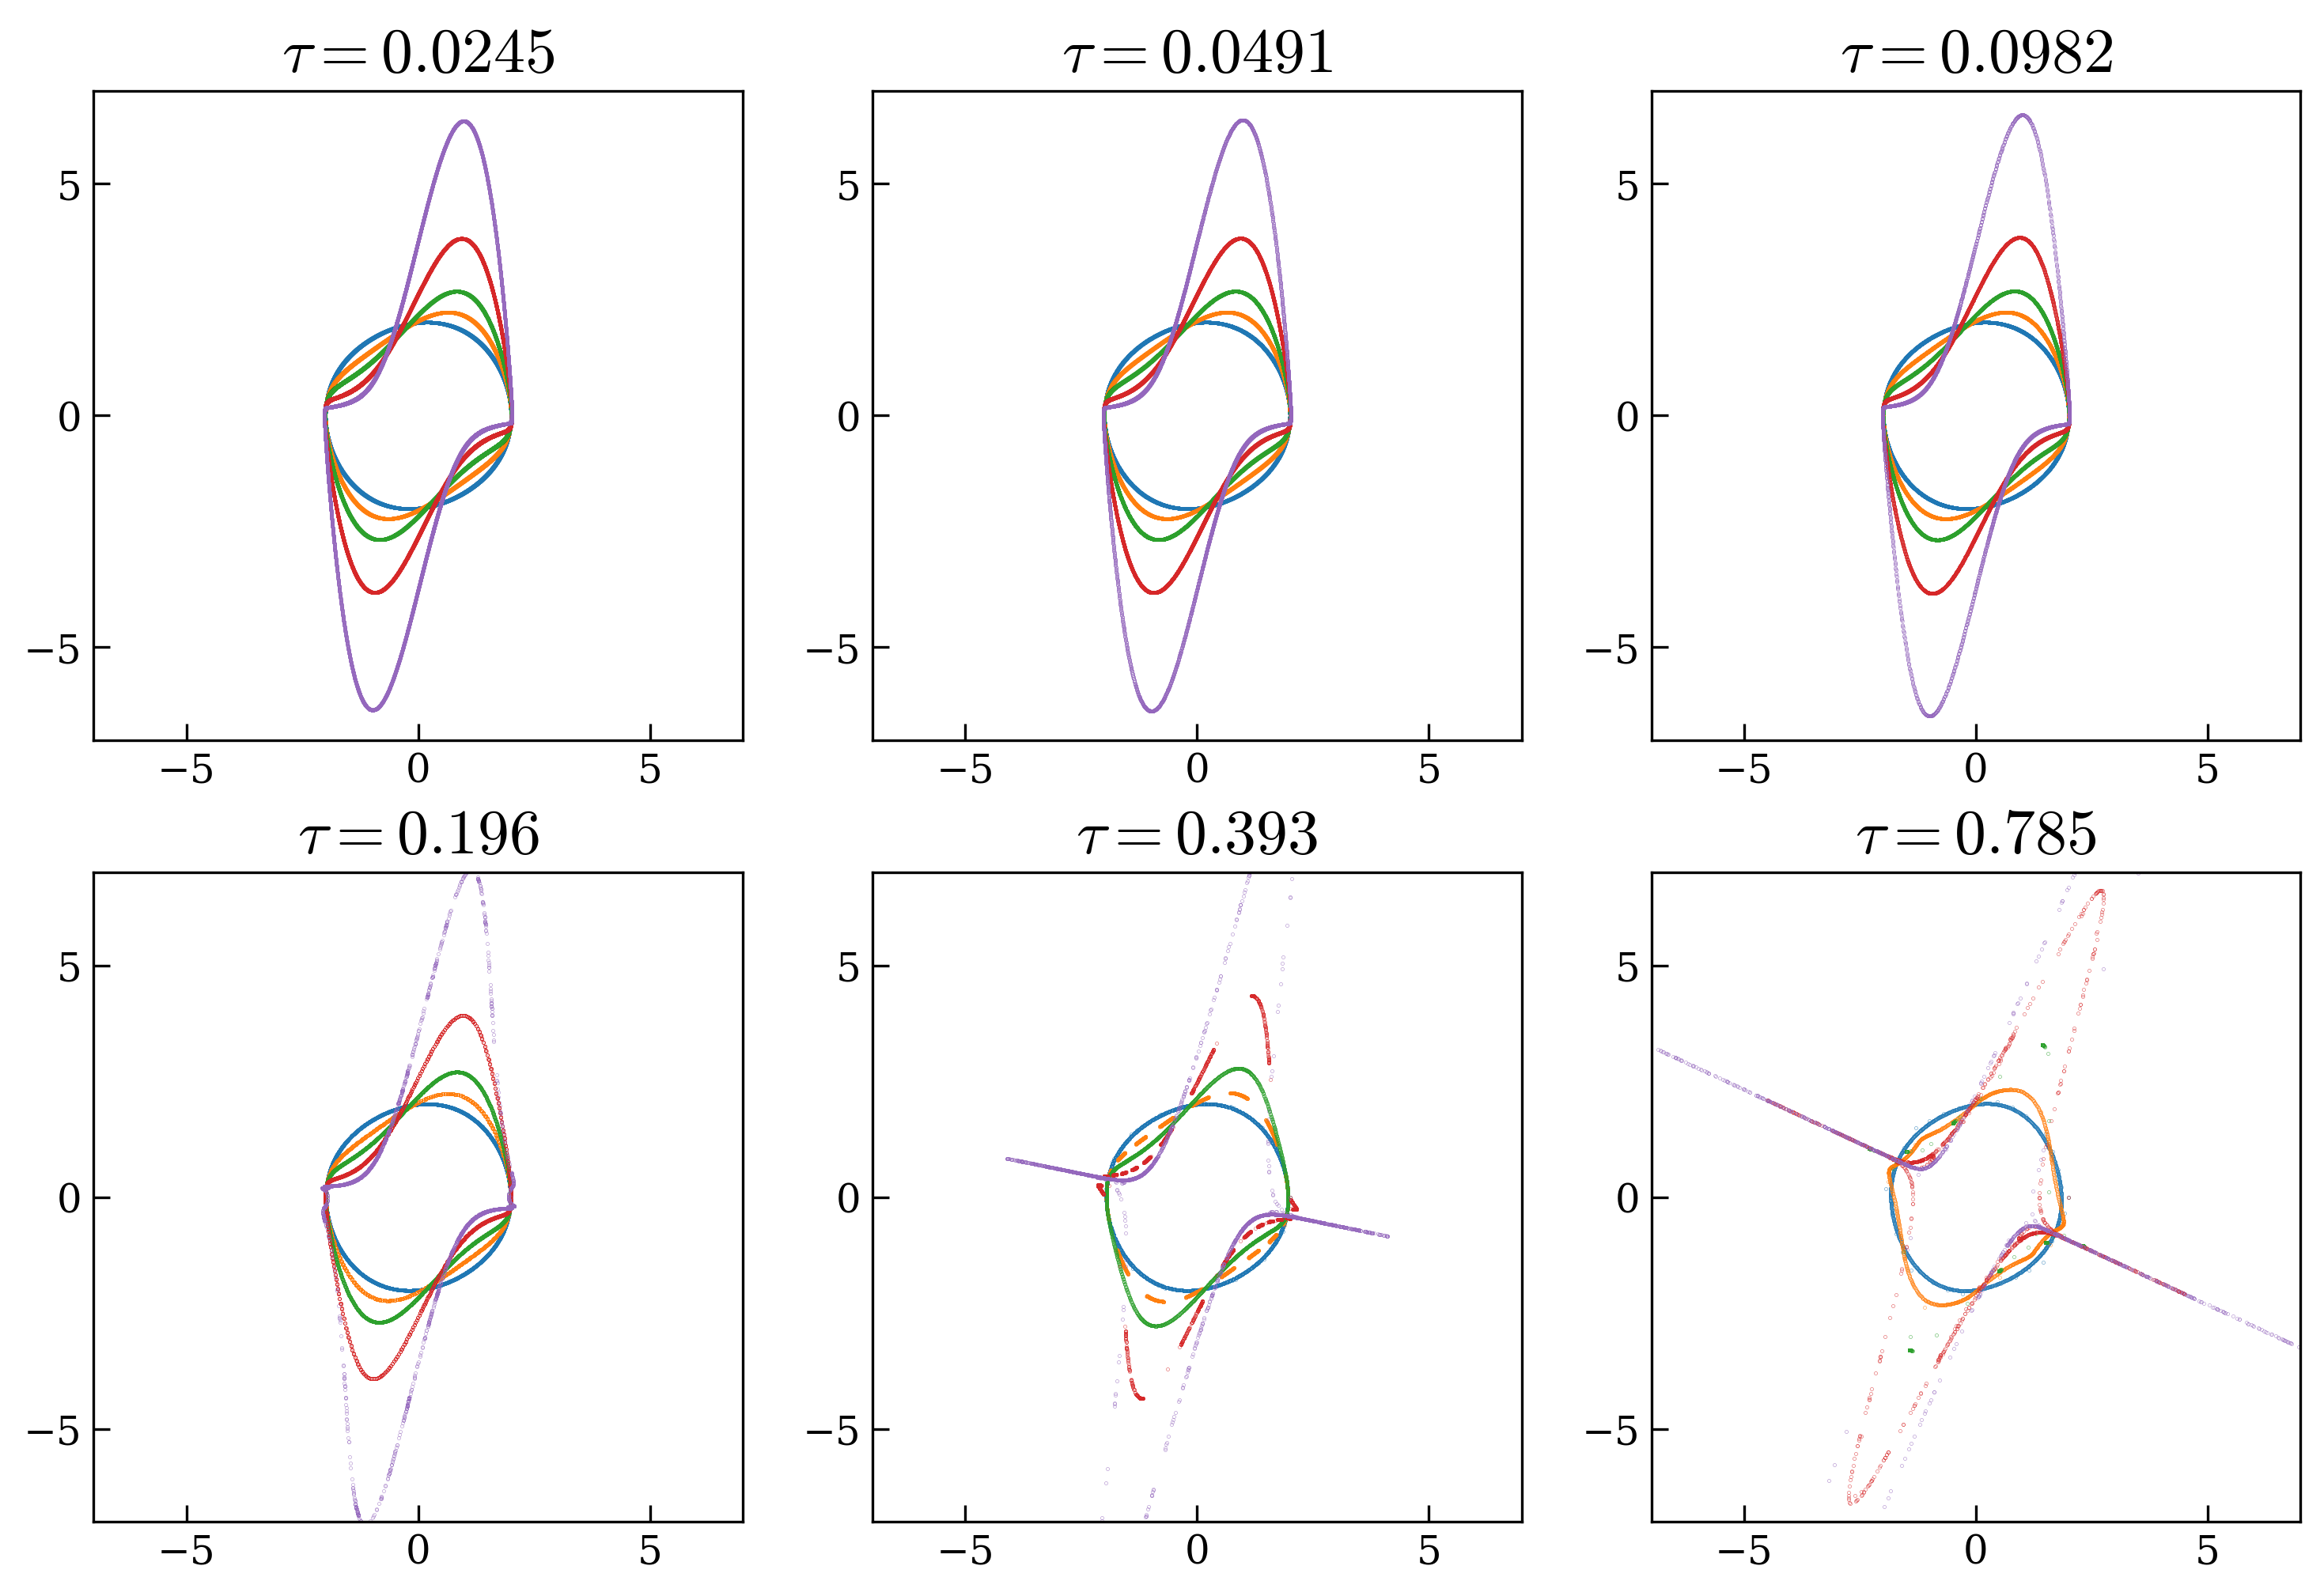

In [16]:
tf = 1000
p0, q0, s0 = 0, 2, 0

elist = [0.1, 0.5, 1, 2, 4]

steps = [(128, 231), (64, 232), (32, 233), (16, 234), (8, 235), (4, 236)]

plt.figure(figsize=(12, 8), dpi=300)

for fact, spl in steps:
    tspan = np.arange(0, tf, np.pi / fact)

    ax = plt.subplot(spl)
    ax.set_title(f"$\\tau={np.pi/fact:.3}$")
    ax.set_xlim((-7, 7))
    ax.set_xticks([-5, 0, 5])
    ax.set_ylim((-7, 7))
    ax.set_yticks([-5, 0, 5])
    ax.set_aspect("equal", adjustable="box")

    for epsilon in elist:
        vdp = VanDerPol(epsilon, 0, 0)
        sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
        ax.plot(
            sol[:, 1],
            sols,
            ".",
            ms=0.2 if fact > 1 else 5,
            label=r"C, $\epsilon = {epsilon}$",
            rasterized=True,
        )

# plt.legend(loc='upper left')
plt.savefig("differentepsilon.pdf")
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making 

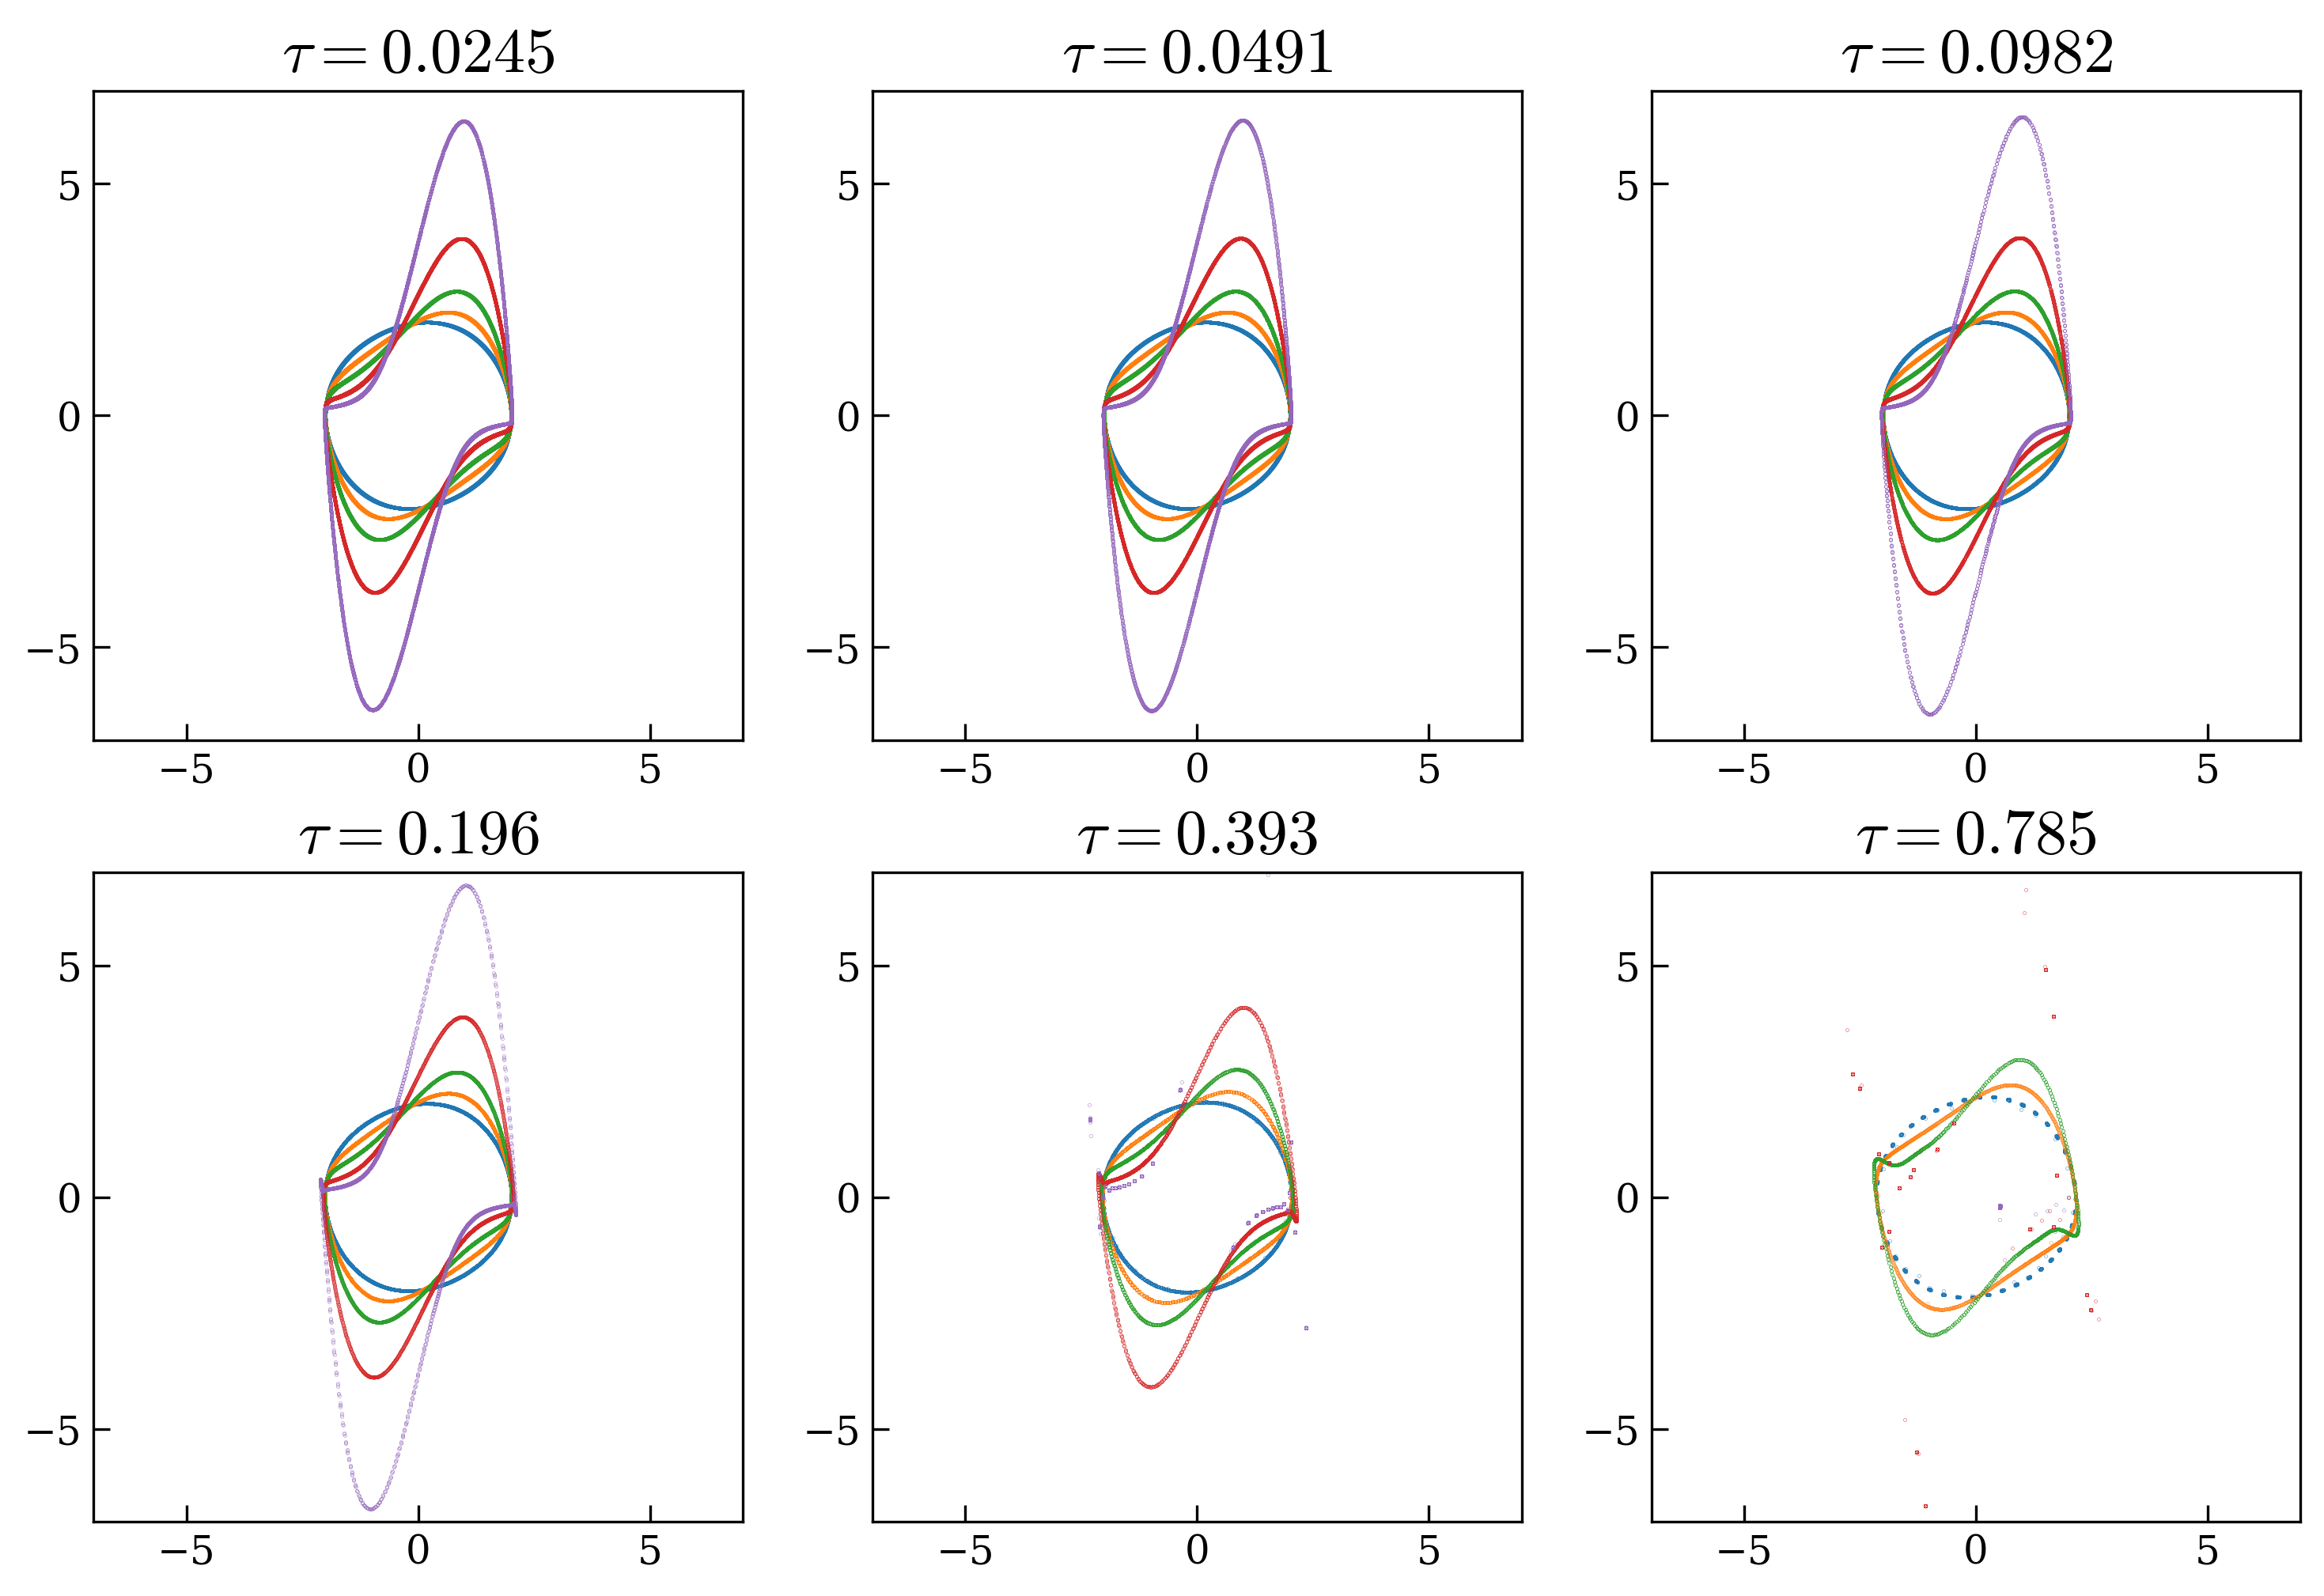

In [17]:
tf = 1000

plt.figure(figsize=(12, 8), dpi=300)

for fact, spl in steps:
    tspan = np.arange(0, tf, np.pi / fact)

    ax = plt.subplot(int(spl))
    ax.set_title(f"$\\tau={np.pi/fact:.3}$")
    ax.set_xlim((-7, 7))
    ax.set_xticks([-5, 0, 5])
    ax.set_ylim((-7, 7))
    ax.set_yticks([-5, 0, 5])
    ax.set_aspect("equal", adjustable="box")

    for epsilon in elist:
        vdpl = lm.VanDerPolLag(epsilon)
        soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)
        ax.plot(
            soll[:, 1],
            soll[:, 0],
            ".",
            ms=0.2 if fact > 1 else 5,
            label=r"L, $\epsilon = {epsilon}$",
            rasterized=True,
        )

# plt.legend(loc="upper left")
plt.savefig("differentepsilon-variational.pdf")
plt.show()

## Orbits for $\epsilon \gg 1$

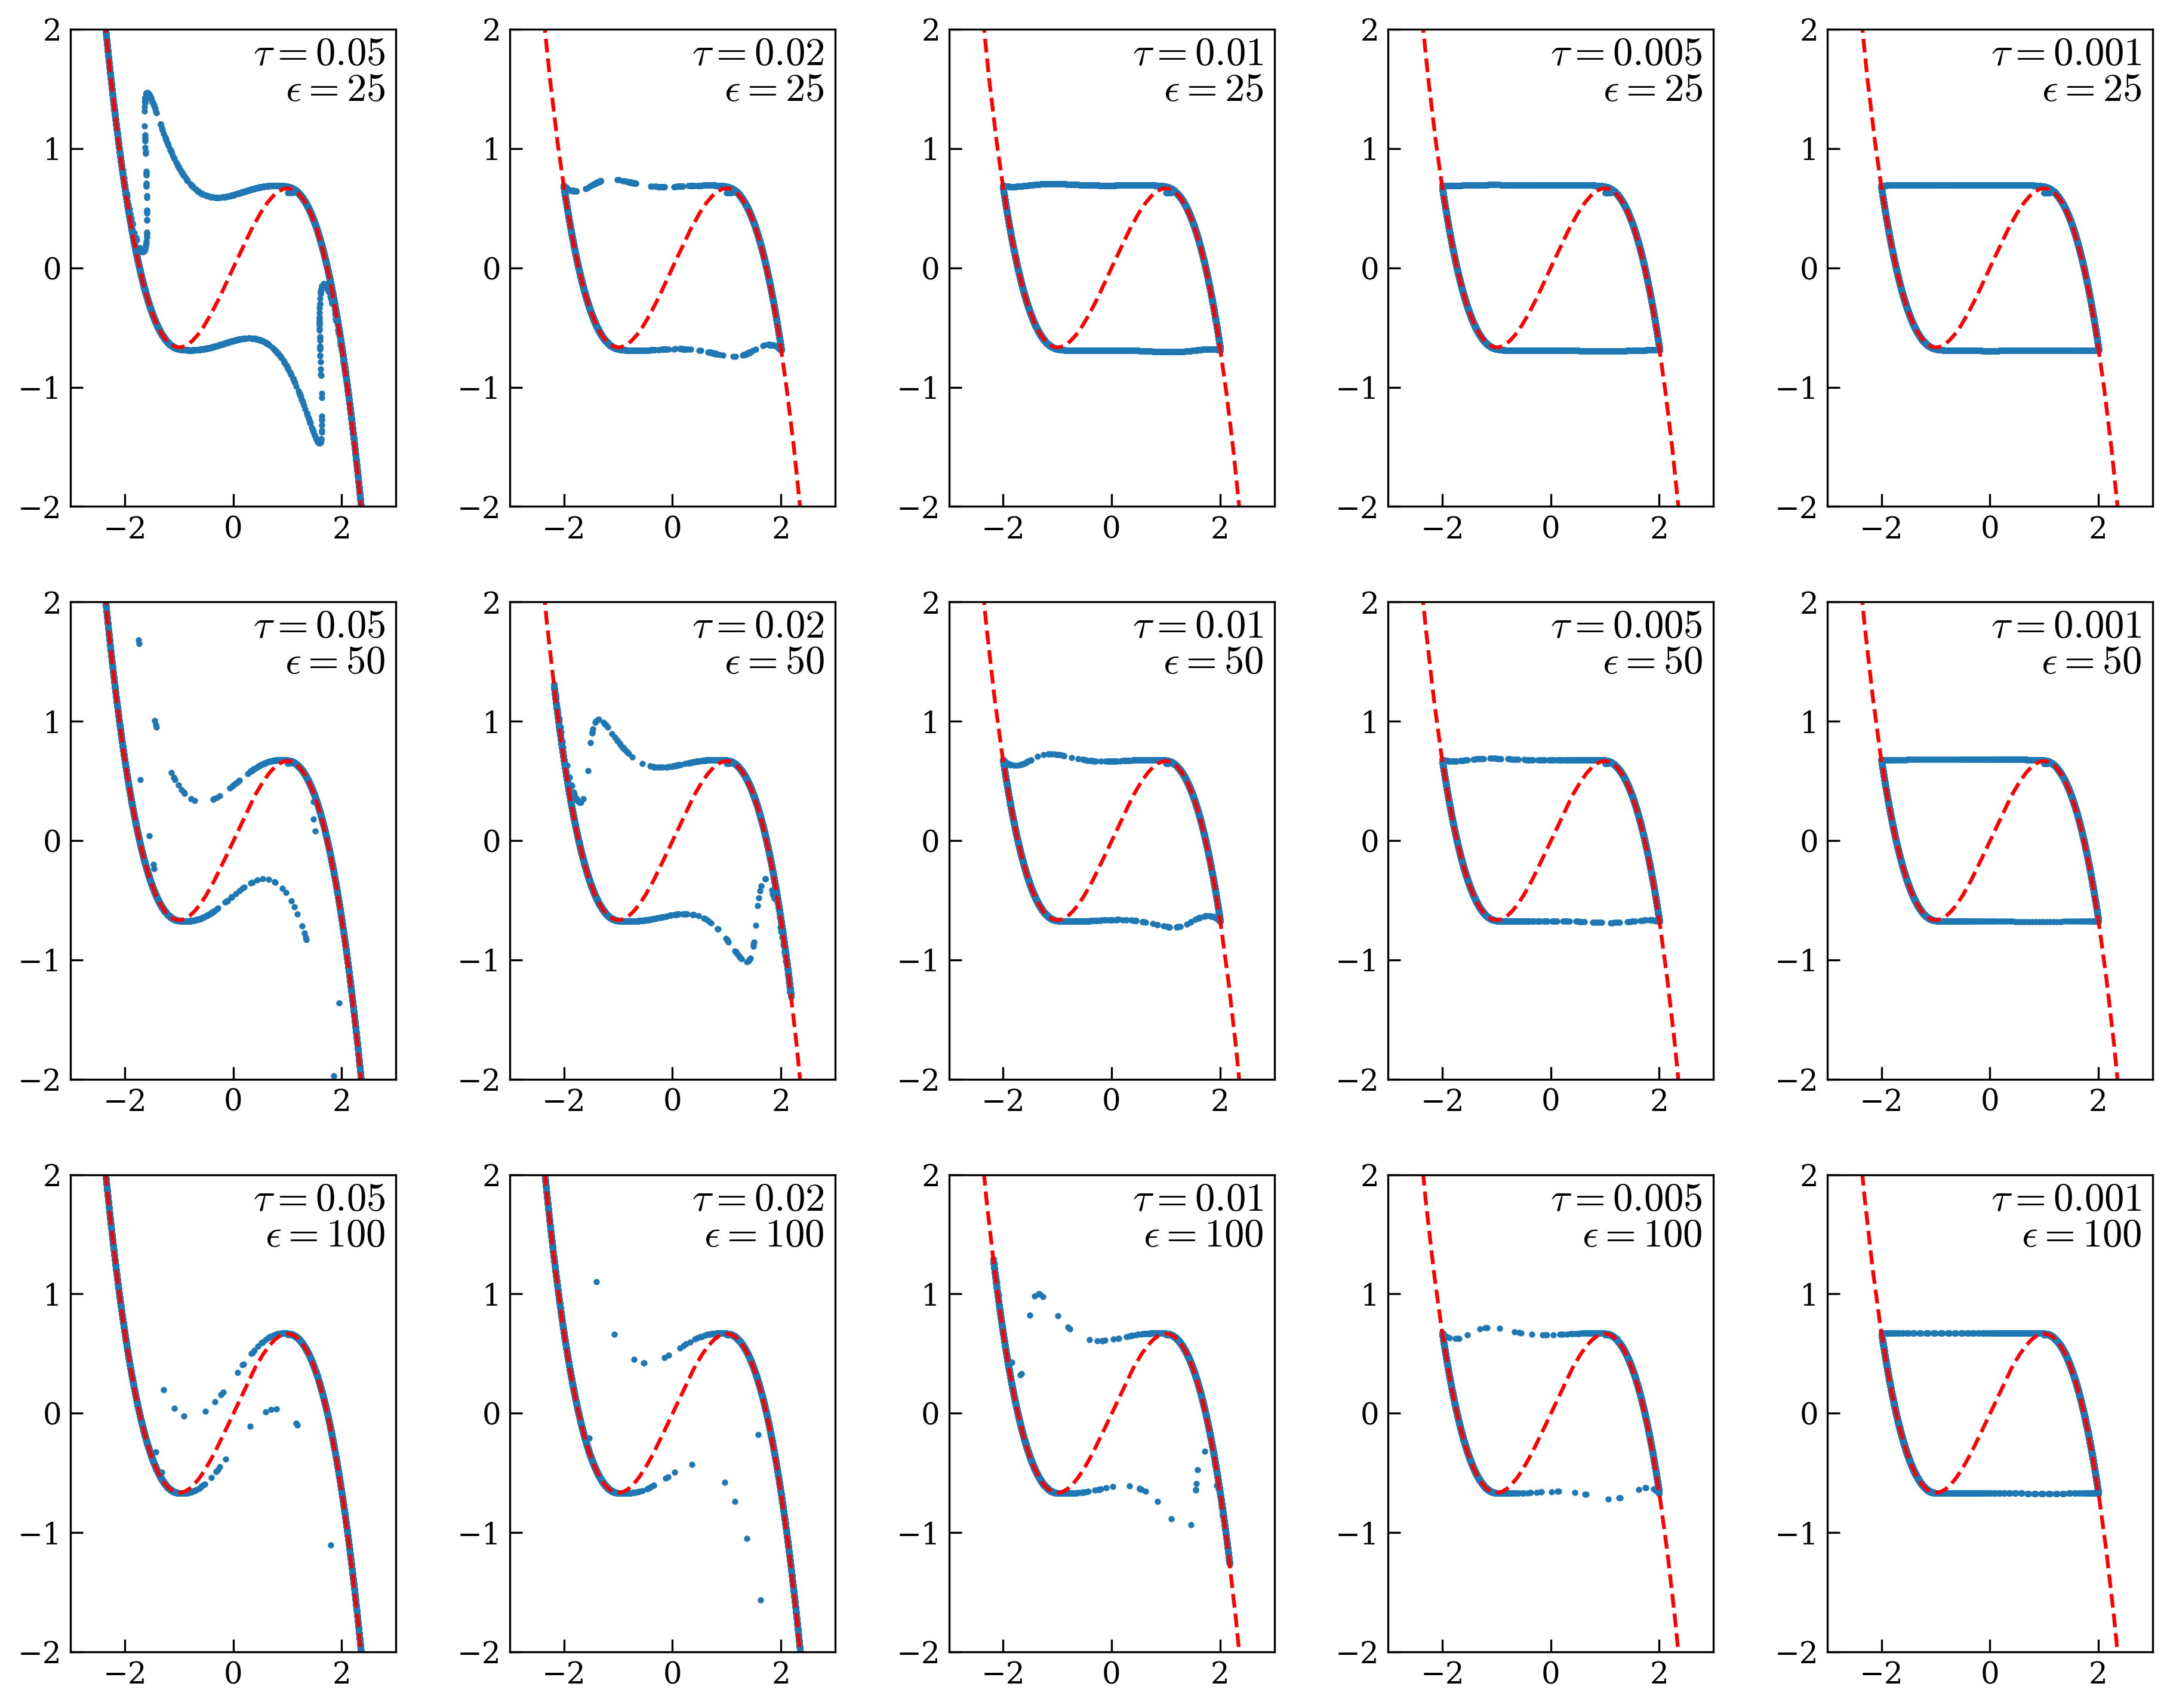

In [18]:
tf = 100000  # 10**7
p0, q0, s0 = -1.0, 1.0, 1.0
r, c = 3, 5

elist = [25, 50, 100]
x = np.arange(-3.5, 3.5, 0.01)

fig = plt.figure(figsize=(15, 12), dpi=300)
plt.subplots_adjust(hspace=0.2, wspace=0.35)

for i, epsilon in enumerate(elist):
    vdp = VanDerPol(epsilon, 0, 0)

    for dt, spl in [(0.05, 1), (0.02, 2), (0.01, 3), (0.005, 4), (0.001, 5)]:
        tspan = np.arange(0, dt * (tf * 10 if epsilon == 100 and spl == 5 else tf), dt)
        ax = fig.add_subplot(r, c, i * c + spl)
        ax.set_xlim(-3, 3)
        ax.set_ylim(-2, 2)
        ax.text(2.8, 1.70, f"$\\tau = {dt}$", horizontalalignment="right")
        ax.text(2.8, 1.40, f"$\epsilon={epsilon}$", horizontalalignment="right")

        sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
        ax.plot(
            sol[:, 1],
            sol[:, 1] - (sol[:, 1]) ** 3 / 3 - (sols / epsilon),
            ".",
            markersize=3,
            rasterized=True,
        )
        ax.plot(x, x - (1 / 3) * (x) ** 3, "r--", rasterized=True)

plt.savefig("orbits.pdf")
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is 

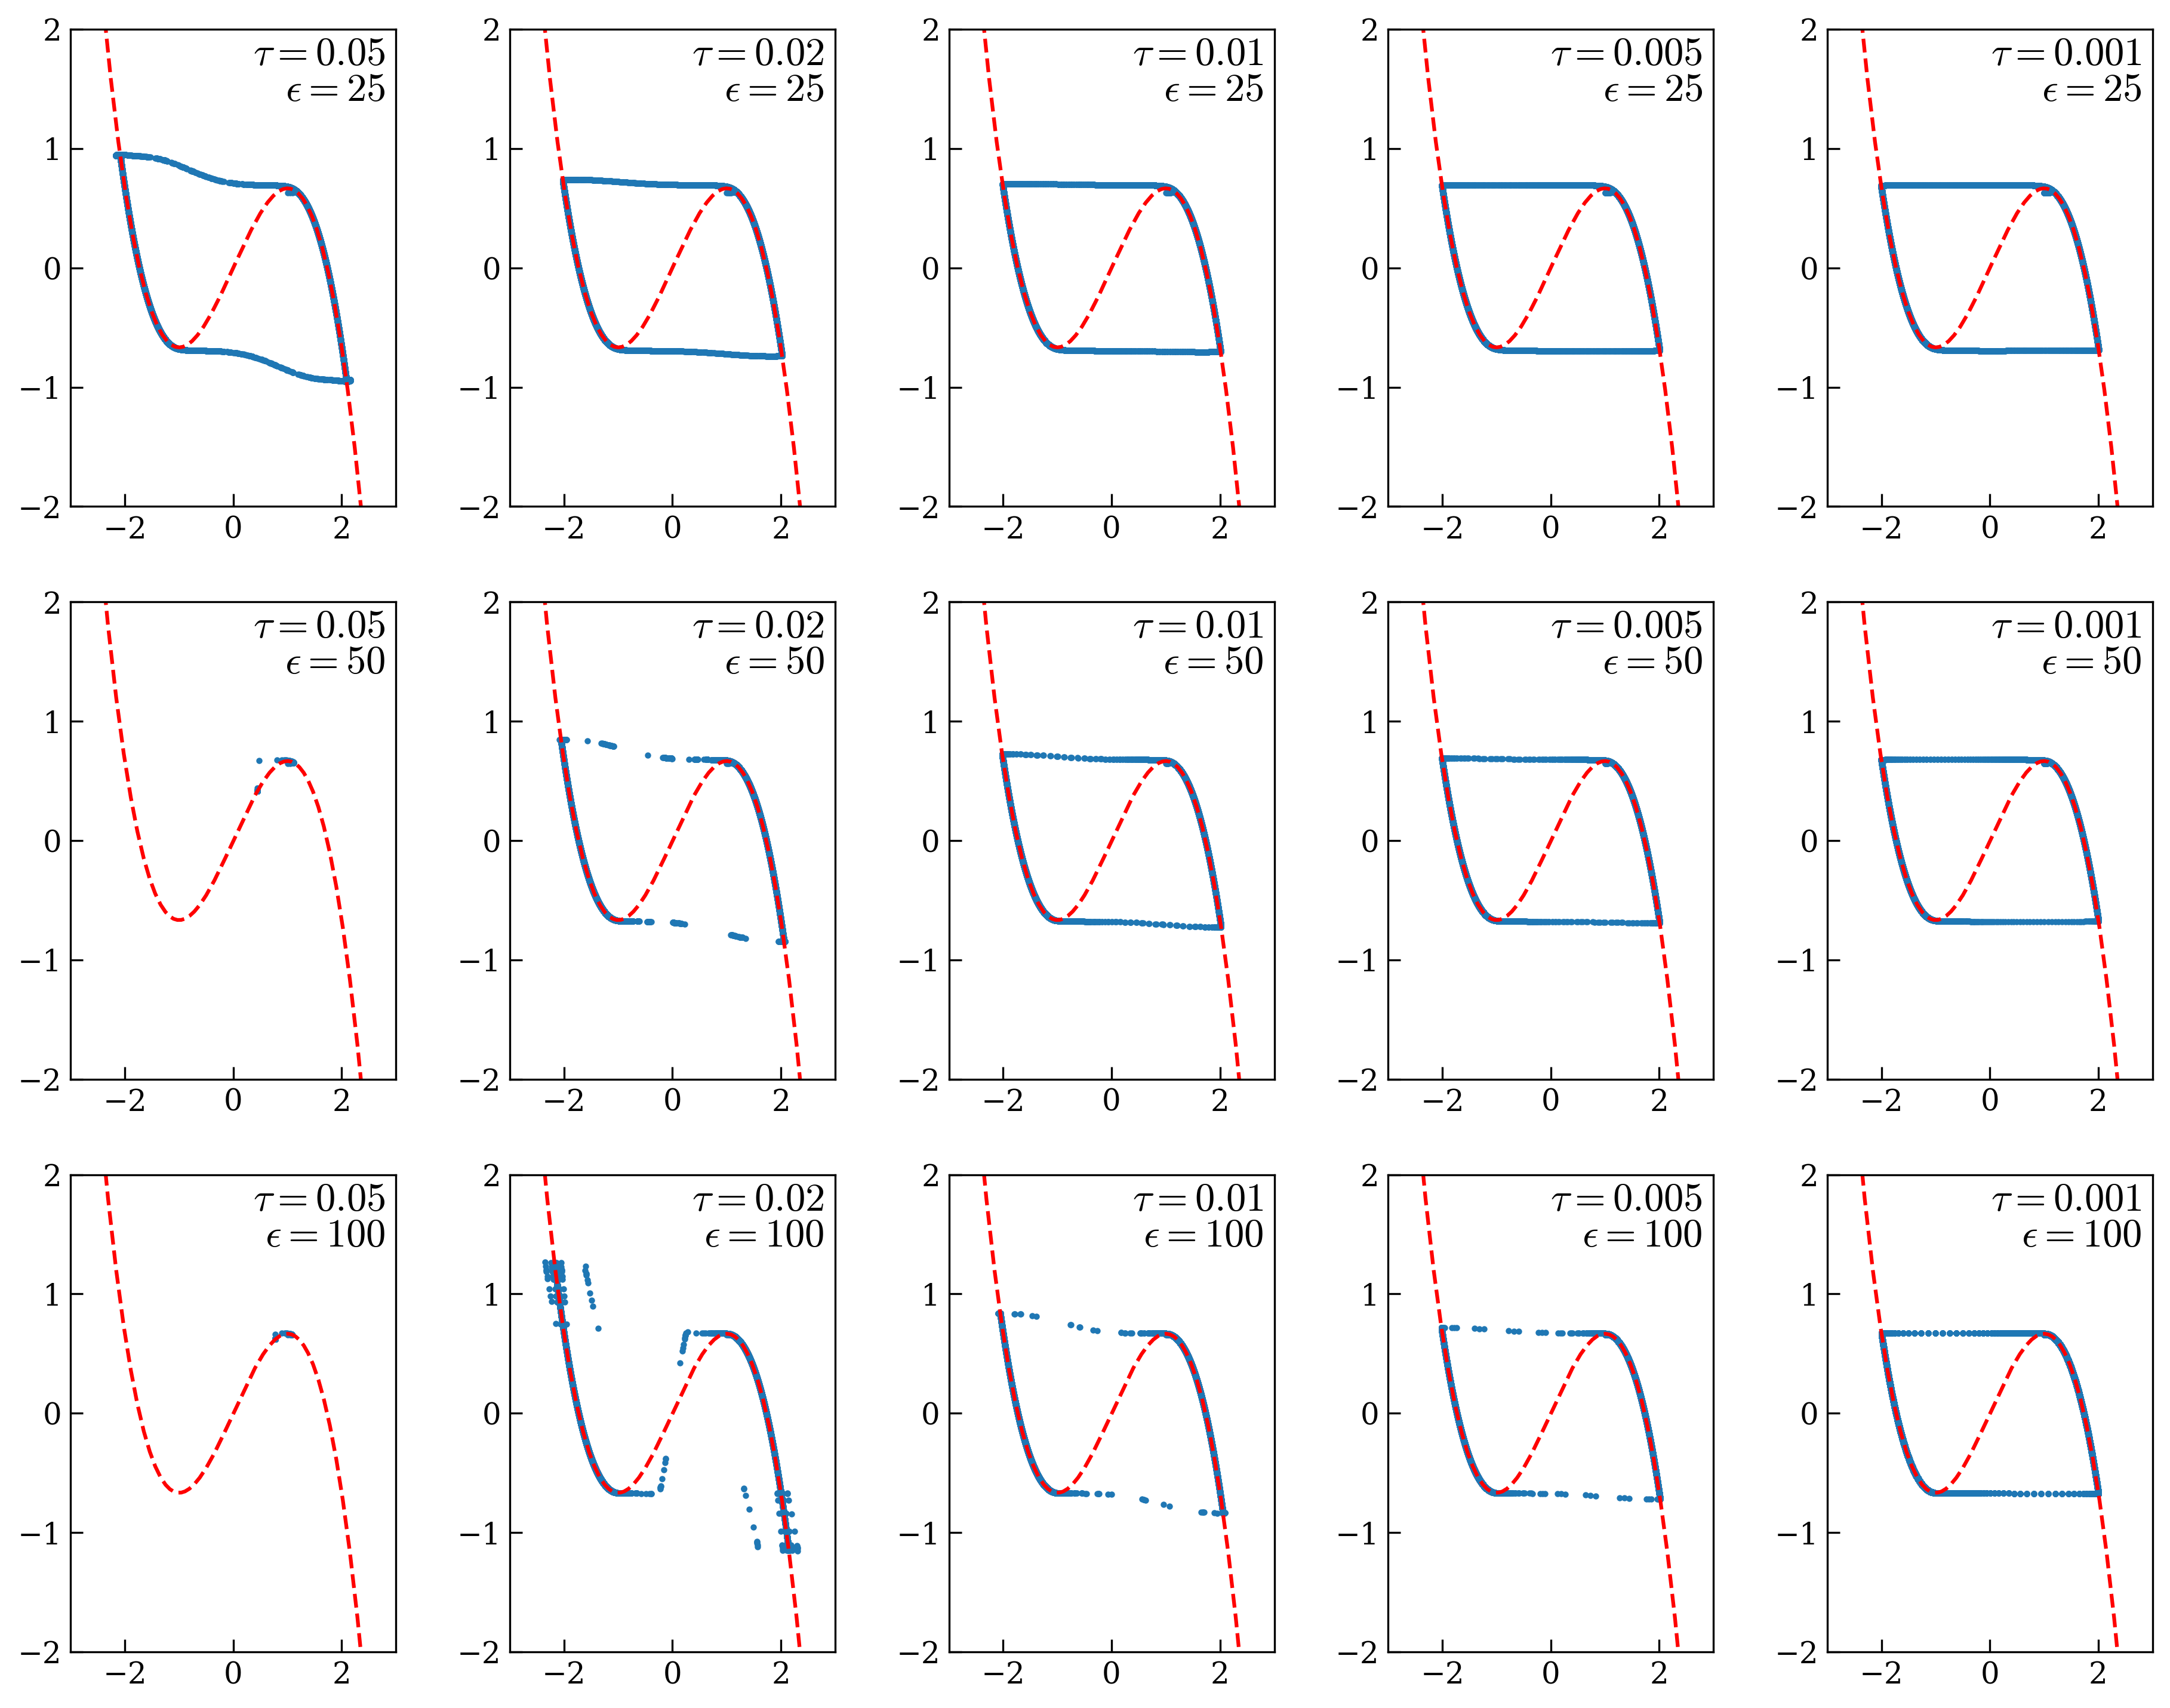

In [19]:
fig = plt.figure(figsize=(15, 12), dpi=300)
plt.subplots_adjust(hspace=0.2, wspace=0.35)

for i, epsilon in enumerate(elist):
    vdpl = lm.VanDerPolLag(epsilon)

    for dt, spl in [(0.05, 1), (0.02, 2), (0.01, 3), (0.005, 4), (0.001, 5)]:
        tspan = np.arange(0, dt * (tf * 10 if epsilon == 100 and spl == 5 else tf), dt)
        ax = fig.add_subplot(r, c, i * c + spl)
        ax.set_xlim(-3, 3)
        ax.set_ylim(-2, 2)
        ax.text(2.8, 1.70, f"$\\tau = {dt}$", horizontalalignment="right")
        ax.text(2.8, 1.40, f"$\epsilon={epsilon}$", horizontalalignment="right")

        soll, _ = forced_lagrangian(vdpl, tspan, s0, q0)
        ax.plot(
            soll[:, 1],
            soll[:, 1] - (soll[:, 1]) ** 3 / 3 - (soll[:, 0] / epsilon),
            ".",
            markersize=3,
            rasterized=True,
        )
        ax.plot(x, x - (1 / 3) * (x) ** 3, "r--", rasterized=True)

plt.savefig("orbits-variational.pdf")
plt.show()